<a href="https://colab.research.google.com/github/007jayesh/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day (Ordinal,Categorical)
* ### Rented Bike count - Count of bikes rented at each hour (Numerical)
* ### Hour - Hour of the day ()
* ### Temperature-Temperature in Celsius (Numerical)
* ### Humidity - % (Numerical)
* ### Windspeed - m/s (Numerical)
* ### Visibility - 10m (Numerical)
* ### Dew point temperature - Celsius (Numerical)
* ### Solar radiation - MJ/m2 (Numerical)
* ### Rainfall - mm (Numerical)
* ### Snowfall - cm (Numerical)
* ### Seasons - Winter, Spring, Summer, Autumn (Categorical)
* ### Holiday - Holiday/No holiday (Categorical)
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours) (Categorical)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/My Drive/Capstone Regression"

/content/drive/My Drive/Capstone Regression


In [4]:
!ls

'Bike Sharing Demand Prediction - Capstone Project.ipynb'   SeoulBikeData.csv


In [5]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
#checking the first 10 Rows
df1 = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape') 
df1.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [7]:
#checking the last 5 Rows
df1.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
df=df1.copy()

In [9]:
df = df.rename(columns= {'Rented Bike Count': 'Rented_Bike_Count','Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_hour'})

In [10]:
#printing total rows and Columns
df.shape

(8760, 14)

In [11]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_hour'],
      dtype='object')

In [12]:
# Checking the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8760 non-null   object 
 1   Rented_Bike_Count  8760 non-null   int64  
 2   Hour               8760 non-null   int64  
 3   temp               8760 non-null   float64
 4   humidity           8760 non-null   int64  
 5   wind_speed         8760 non-null   float64
 6   visibility         8760 non-null   int64  
 7   dew_point_temp     8760 non-null   float64
 8   solar_radiation    8760 non-null   float64
 9   rainfall           8760 non-null   float64
 10  snowfall           8760 non-null   float64
 11  seasons            8760 non-null   object 
 12  holiday            8760 non-null   object 
 13  func_hour          8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [13]:
# Checking null values of data 
df.isna().sum()

Date                 0
Rented_Bike_Count    0
Hour                 0
temp                 0
humidity             0
wind_speed           0
visibility           0
dew_point_temp       0
solar_radiation      0
rainfall             0
snowfall             0
seasons              0
holiday              0
func_hour            0
dtype: int64

In [14]:
df.describe(include='all')

,Date,Rented_Bike_Count,Hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_hour
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [15]:
from datetime import datetime
import datetime as dt
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))

In [16]:
df["Year"]=df["Date"].map(lambda x: x.year).astype("object")
df["Month"]=df["Date"].dt.month_name()
df['Dayname'] = df['Date'].dt.day_name()

In [17]:
print(df['Month'].unique())

['December' 'January' 'February' 'March' 'April' 'May' 'June' 'July'
 'August' 'September' 'October' 'November']


In [18]:
print(df['Dayname'].unique())

['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


In [19]:
df = df.drop(columns = ['Date'], axis = 1)

In [20]:
# Updated dataset
df.head()

,Rented_Bike_Count,Hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_hour,Year,Month,Dayname
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday


In [21]:
Cat_Hour = ['Hour']
for i in Cat_Hour:
  df[i] = df[i].astype('category')

In [22]:
df.head()

,Rented_Bike_Count,Hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_hour,Year,Month,Dayname
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday


#Checking Dependant variable

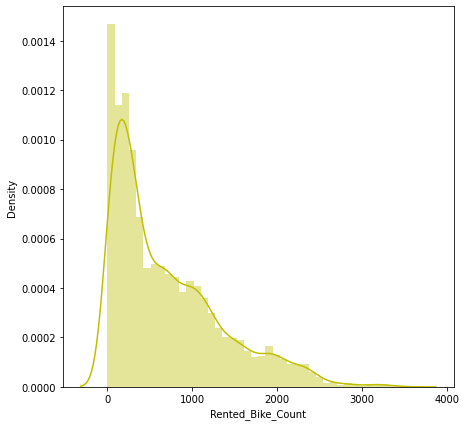

In [23]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented_Bike_Count'],color="y")

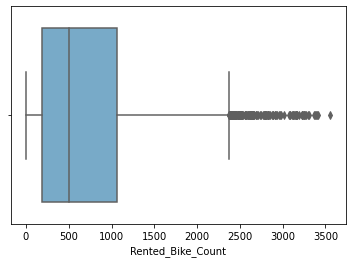

In [24]:
sns.boxplot(df['Rented_Bike_Count'],palette="Blues")

In [25]:
df.Rented_Bike_Count.mean()

704.6020547945205

In [26]:
df.Rented_Bike_Count.std()

644.9974677392156

In [27]:
df_dummy=df.copy()

Statistical outlier detection
Statistical outlier detection involves applying statistical tests or procedures to identify extreme values.

You can convert extreme data points into z scores that tell you how many standard deviations away they are from the mean.

If a value has a high enough or low enough z score, it can be considered an outlier. As a rule of thumb, values with a z score greater than 3 or less than –3 are often determined to be outliers.

In [28]:
df_dummy['zscore'] = ( df_dummy.Rented_Bike_Count - df_dummy.Rented_Bike_Count.mean() ) / df_dummy.Rented_Bike_Count.std()
df_dummy.head(5)

,Rented_Bike_Count,Hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_hour,Year,Month,Dayname,zscore
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,-0.698611
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,-0.776130
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,-0.824192
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,-0.926518
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,-0.971480


In [29]:
df_dummy[df_dummy['zscore']>3]

,Rented_Bike_Count,Hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_hour,Year,Month,Dayname,zscore
3282,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes,2018,April,Monday,3.081249
3498,2807,18,21.2,32,3.8,1927,3.8,0.94,0.0,0.0,Spring,No Holiday,Yes,2018,April,Wednesday,3.259544
3714,2661,18,17.1,35,3.4,1961,1.4,1.11,0.0,0.0,Spring,No Holiday,Yes,2018,May,Friday,3.033187
3834,3130,18,20.6,41,2.3,2000,6.8,1.10,0.0,0.0,Spring,No Holiday,Yes,2018,May,Wednesday,3.760322
3882,2701,18,17.9,37,3.1,1819,2.9,0.36,0.0,0.0,Spring,No Holiday,Yes,2018,May,Friday,3.095203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,3277,18,25.3,56,2.8,1992,15.8,0.54,0.0,0.0,Autumn,No Holiday,Yes,2018,September,Monday,3.988230
7218,3154,18,22.5,38,0.8,2000,7.4,0.31,0.0,0.0,Autumn,No Holiday,Yes,2018,September,Thursday,3.797531
7314,2857,18,16.6,61,2.9,2000,9.0,0.16,0.0,0.0,Autumn,No Holiday,Yes,2018,October,Monday,3.337064
7482,2787,18,18.1,39,1.0,2000,3.9,0.21,0.0,0.0,Autumn,No Holiday,Yes,2018,October,Monday,3.228537


In [30]:
df_no_outliers = df_dummy[(df_dummy.zscore>-3) & (df_dummy.zscore<3)]
df_no_outliers.head()

,Rented_Bike_Count,Hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_hour,Year,Month,Dayname,zscore
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,-0.698611
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,-0.776130
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,-0.824192
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,-0.926518
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,-0.971480


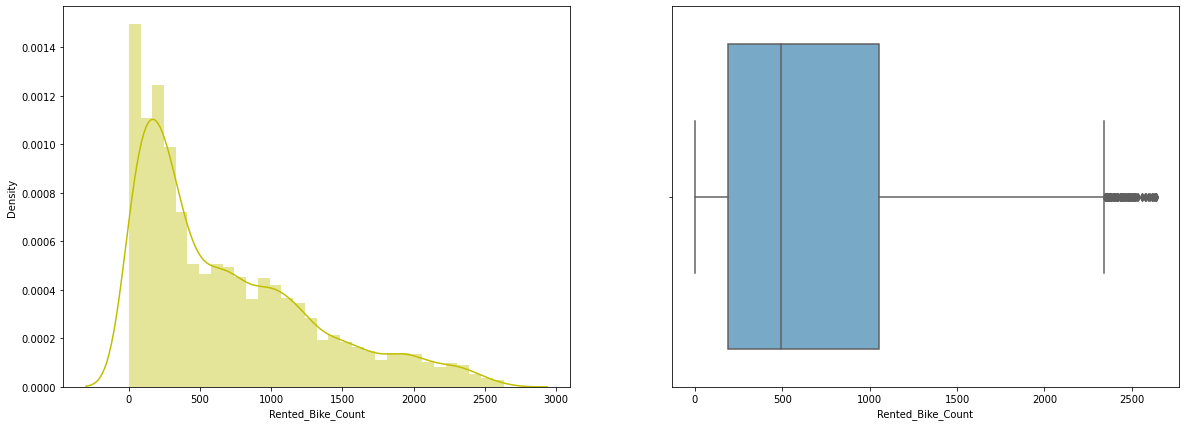

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
ax = axes.flatten()

#plt.figure(figsize=(7,7))
sns.distplot(df_no_outliers['Rented_Bike_Count'],color="y",  ax=ax[0])
sns.boxplot(df_no_outliers['Rented_Bike_Count'],palette="Blues", ax=ax[1])



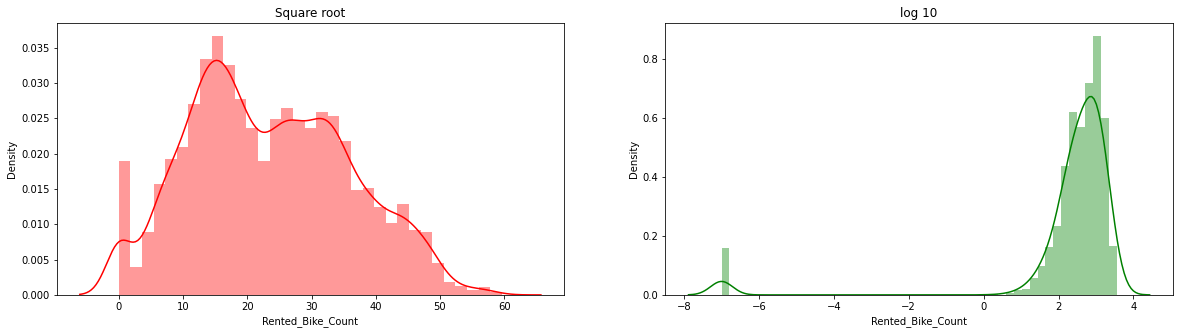

Text(0.5, 1.0, 'No outliers Boxplot')

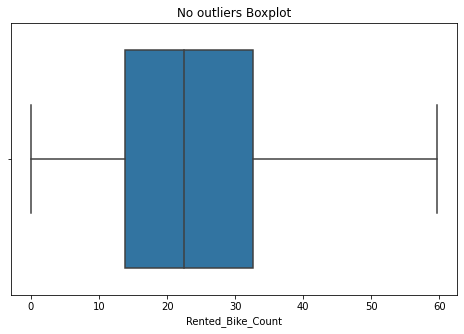

In [32]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
sns.distplot(np.sqrt(df['Rented_Bike_Count']),ax=axes[0], color='red').set_title("Square root")
sns.distplot(np.log10(df['Rented_Bike_Count']+0.0000001),ax=axes[1],color='green').set_title("log 10")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x = np.sqrt(df['Rented_Bike_Count'])).set_title("No outliers Boxplot")

#categorical_variables

In [33]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_hour', 'Year', 'Month',
       'Dayname'],
      dtype='object')

In [34]:
#storing Categorical Variables 
categorical_variables= []
for i in df.columns:
    if df[i].dtypes == 'O' or df[i].dtypes=='category':
        categorical_variables.append(i)
categorical_variables

['Hour', 'seasons', 'holiday', 'func_hour', 'Year', 'Month', 'Dayname']

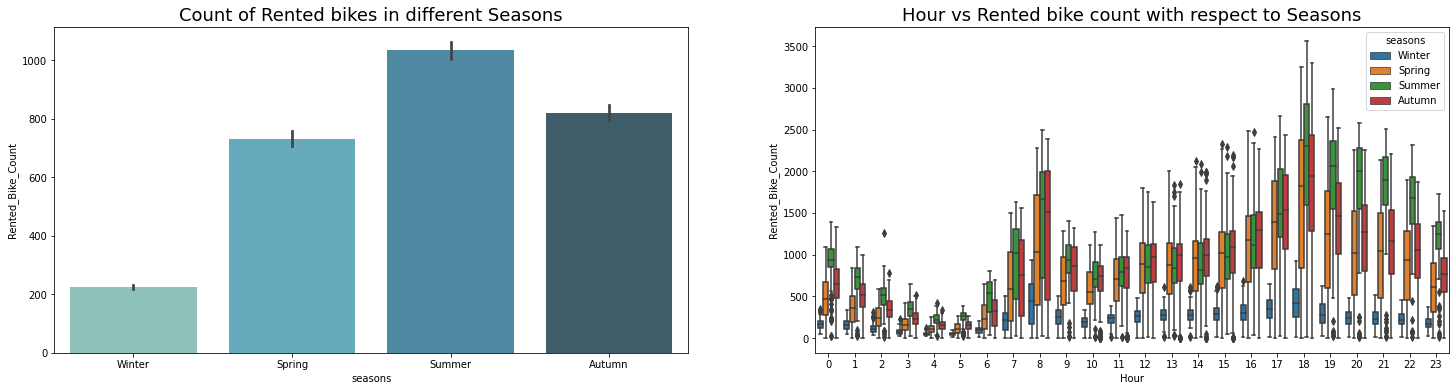

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))
ax = axes.flatten()

#Understanding the count of Rented bikes in different Seasons using bargraph
ax[0].set_title('Count of Rented bikes in different Seasons', fontsize=18)
sns.barplot( x = df['seasons'], y = df['Rented_Bike_Count'],  palette='GnBu_d',ax=ax[0])

#hour vs rented bike count with respect to seasons
ax[1].set_title("Hour vs Rented bike count with respect to Seasons",fontsize=18);
sns.boxplot(data=df, y='Rented_Bike_Count', x='Hour', hue='seasons', ax=ax[1])

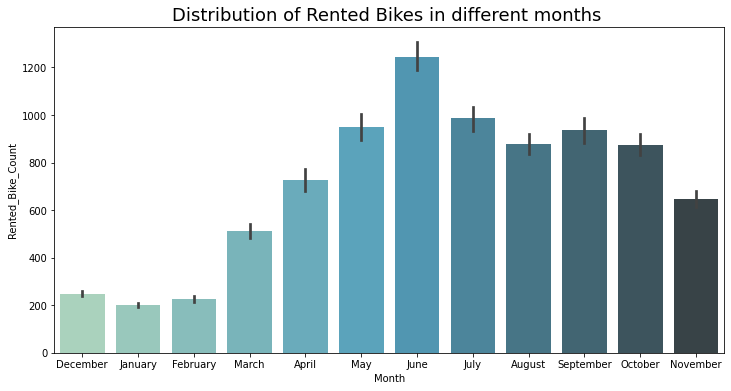

In [36]:
#Plotting the distribution of bike counts in different months 
plt.figure(figsize = (12,6))
plt.title('Distribution of Rented Bikes in different months ', fontsize=18)
sns.barplot( x = df['Month'], y = df['Rented_Bike_Count'],  palette='GnBu_d')

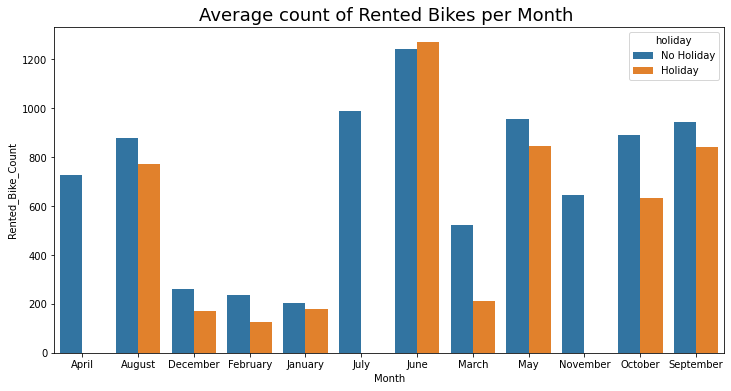

In [37]:
plt.figure(figsize = (12,6))
plt.title('Average count of Rented Bikes per Month ', fontsize=18)
group_month = pd.DataFrame(df.groupby(['Month', 'holiday'])['Rented_Bike_Count'].mean()).reset_index()
sns.barplot(data=group_month, x='Month', y='Rented_Bike_Count', hue='holiday')


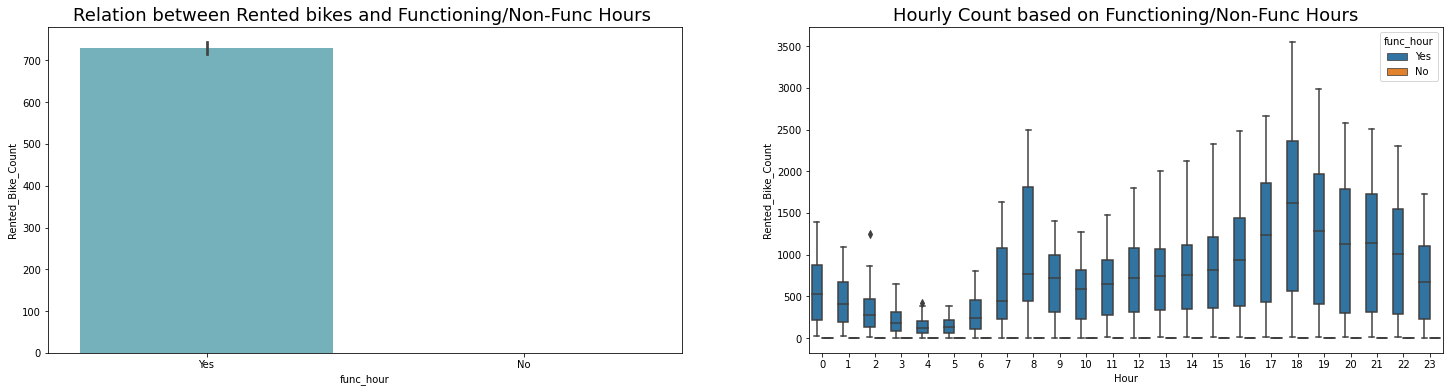

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))
ax = axes.flatten()
#Relation between Rented bikes and Functioning/Non-Func Hours
ax[0].set_title('Relation between Rented bikes and Functioning/Non-Func Hours ', fontsize=18)
sns.barplot( x = df['func_hour'], y = df['Rented_Bike_Count'],  palette='GnBu_d',ax=ax[0])

#Checking which hours have high number of rented Bikes on Functioning/Non-Func Hours
ax[1].set_title("Hourly Count based on Functioning/Non-Func Hours",fontsize=18);
sns.boxplot(data=df, y='Rented_Bike_Count', x='Hour', hue='func_hour', ax=ax[1])

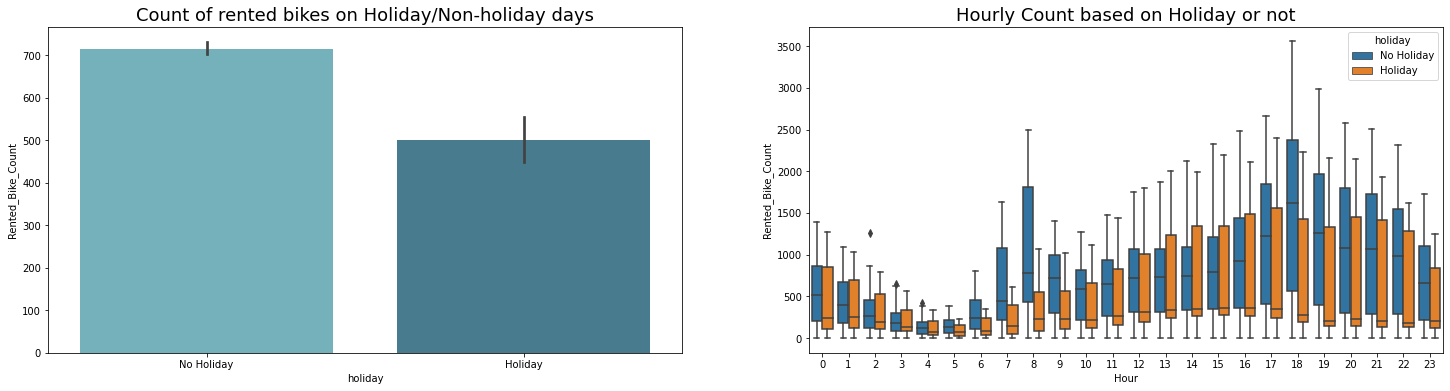

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))
ax = axes.flatten()

#Plotting Bargraph between Rented bikes and Holiday/Non-holiday days
ax[0].set_title("Count of rented bikes on Holiday/Non-holiday days", fontsize=18);
sns.barplot( x = df['holiday'], y = df['Rented_Bike_Count'],  palette='GnBu_d',ax=ax[0])

#Checking which hours have high number of rented Bikes on a Holiday/Non-holiday
ax[1].set_title("Hourly Count based on Holiday or not",fontsize=18);
sns.boxplot(data=df, y='Rented_Bike_Count', x='Hour', hue='holiday', ax=ax[1])

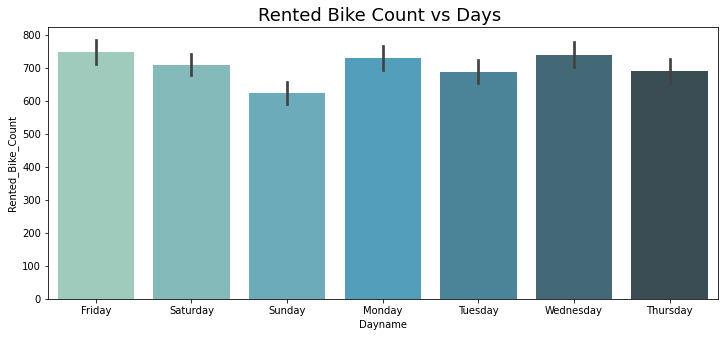

In [40]:
#plot for the rented bike vs weekday
plt.figure(figsize = (12,5))
plt.title('Rented Bike Count vs Days ', fontsize=18)
sns.barplot( x = df['Dayname'], y = df['Rented_Bike_Count'],  palette='GnBu_d')

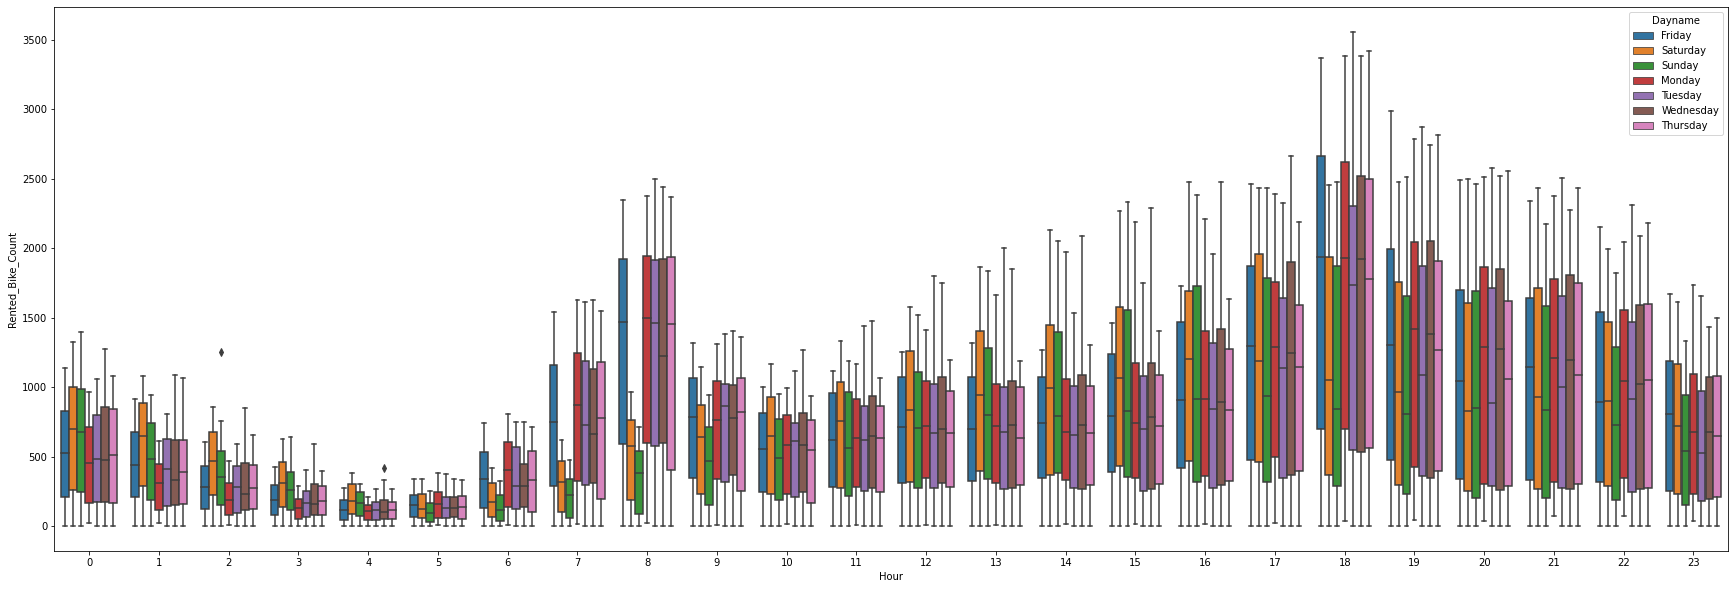

In [41]:
plt.figure(figsize = (30,10))
sns.boxplot(data=df, y='Rented_Bike_Count', x='Hour', hue='Dayname')

#Exploring Numerical Features

In [42]:
#appending numerical variables in a list
numerical_variables=[]
for i in df.columns:
    if df[i].dtypes != 'O' and i not in ['Rented_Bike_Count','Hour','Year','Month', 'Dayname']:
        numerical_variables.append(i)
numerical_variables

['temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall']

Text(0.5, 1.0, 'Temp vs. Rented Bikes Count')

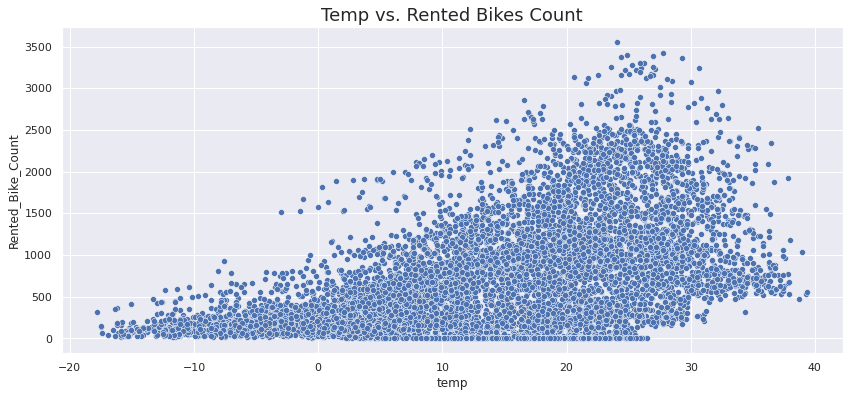

In [43]:
import seaborn
seaborn.set(style='whitegrid')
sns.set(rc = {'figure.figsize':(14,6)})
Bike_vs_temp=seaborn.scatterplot(x="temp",
                    y="Rented_Bike_Count",
                    data=df)
Bike_vs_temp.set_title("Temp vs. Rented Bikes Count",fontsize=18)



Text(0.5, 1.0, 'Humidity vs. Rented Bikes Count')

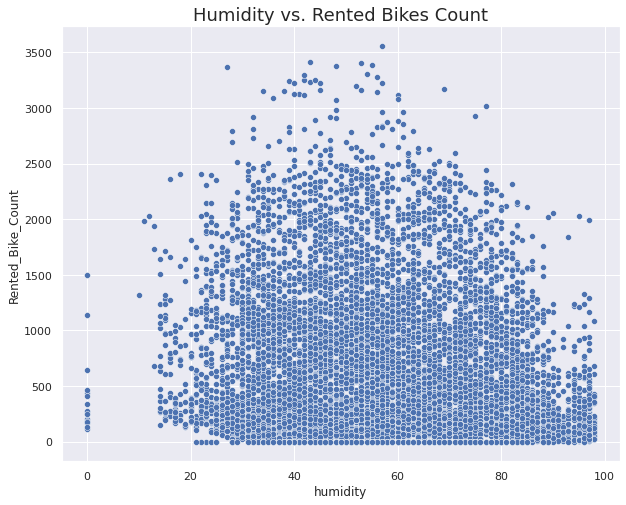

In [44]:
seaborn.set(style='whitegrid')
sns.set(rc = {'figure.figsize':(10,8)})
Bike_vs_humidity=seaborn.scatterplot(x="humidity",
                    y="Rented_Bike_Count",
                    data=df)
Bike_vs_humidity.set_title("Humidity vs. Rented Bikes Count",fontsize=18)

Could not intrepret the relation between the humidity and Rented bike counts through scatter plot, let's try line plot to see if we can get any specific results

Text(0.5, 1.0, 'Humidity vs. Rented Bikes Count')

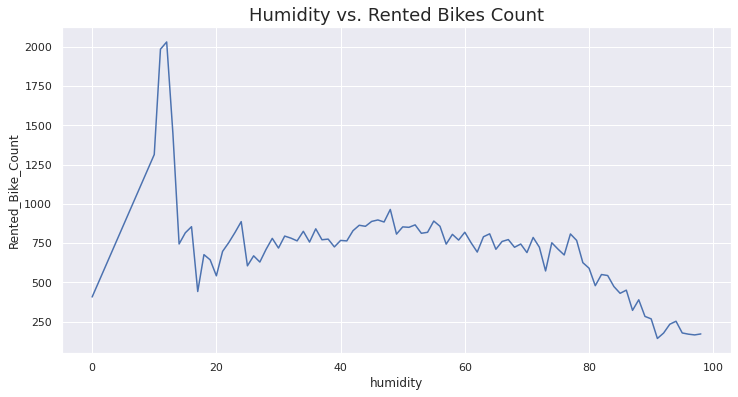

In [45]:
plt.figure(figsize=(12,6))
temp_df = df.groupby('humidity').mean()['Rented_Bike_Count']
x = sns.lineplot(data=temp_df)
x.set_title("Humidity vs. Rented Bikes Count",fontsize=18)

Text(0.5, 1.0, 'Wind vs. Rented Bikes Count')

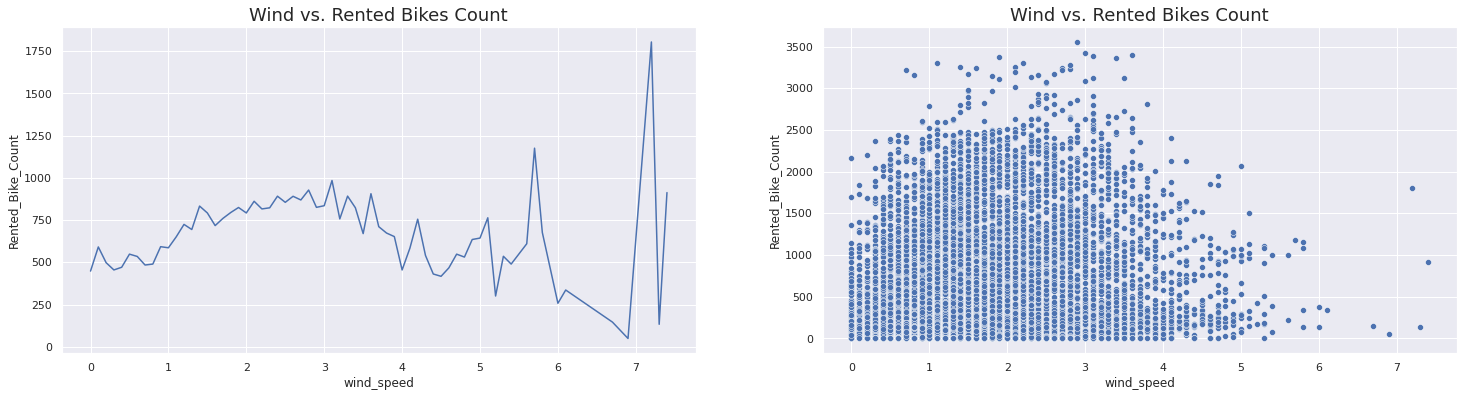

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))
ax = axes.flatten()

temp_df = df.groupby('wind_speed').mean()['Rented_Bike_Count']
wind_vs_Bike = sns.lineplot(data=temp_df,ax=ax[0])
wind_vs_Bike.set_title("Wind vs. Rented Bikes Count",fontsize=18)

wind_vs_Bike1=sns.scatterplot(x="wind_speed",
                    y="Rented_Bike_Count",
                    data=df,ax=ax[1])
wind_vs_Bike1.set_title("Wind vs. Rented Bikes Count",fontsize=18)



Text(0.5, 1.0, 'solar_radiation vs. Rented Bikes Count')

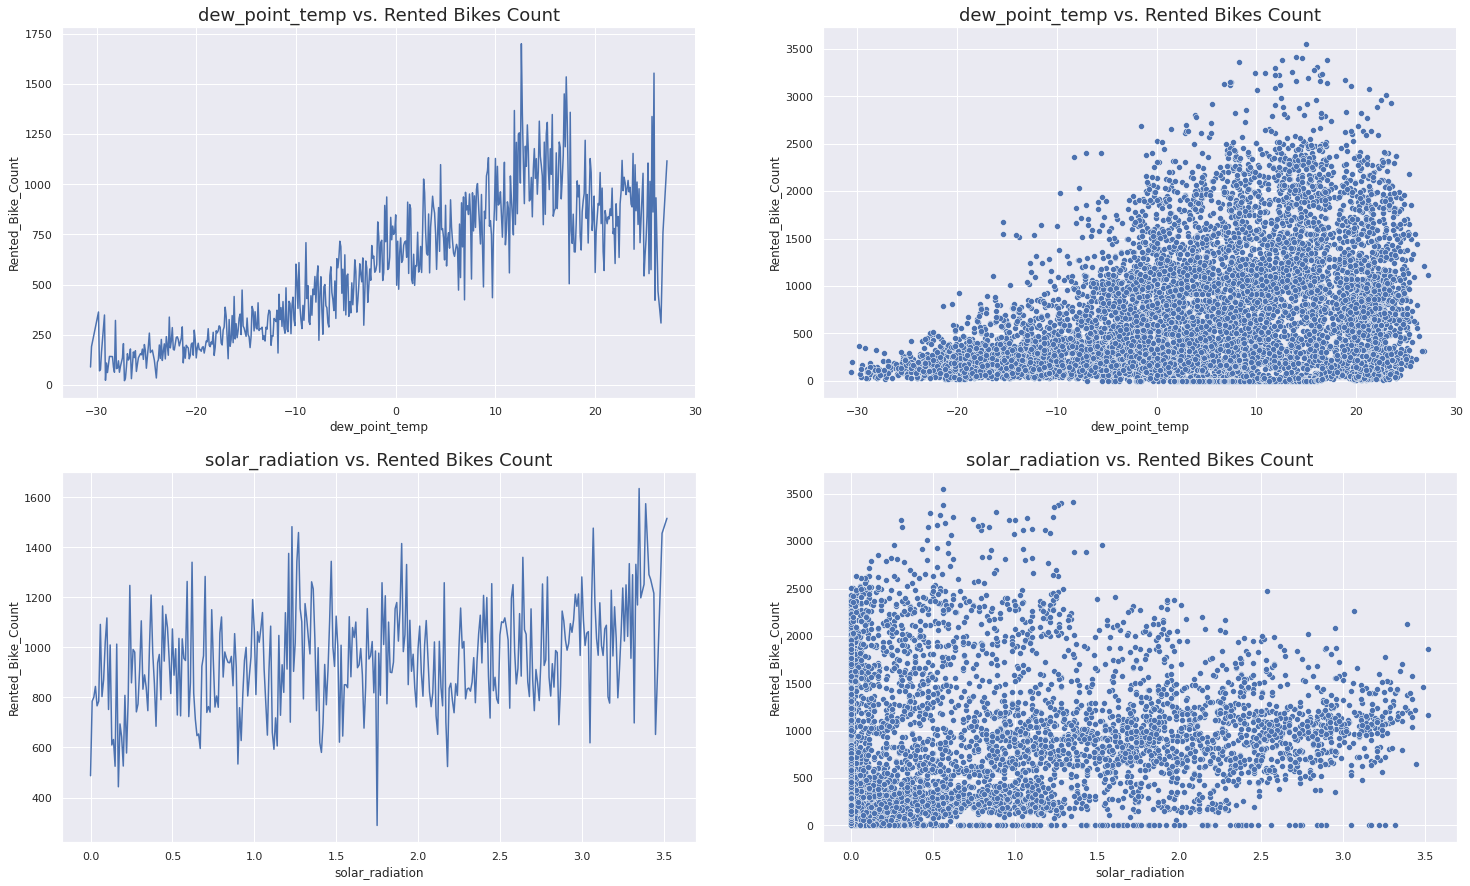

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))
ax = axes.flatten()

temp_df = df.groupby('dew_point_temp').mean()['Rented_Bike_Count']
wind_vs_Bike = sns.lineplot(data=temp_df,ax=ax[0])
wind_vs_Bike.set_title("dew_point_temp vs. Rented Bikes Count",fontsize=18)

wind_vs_Bike1=sns.scatterplot(x="dew_point_temp",
                    y="Rented_Bike_Count",
                    data=df,ax=ax[1])
wind_vs_Bike1.set_title("dew_point_temp vs. Rented Bikes Count",fontsize=18)

#Solar Radiation
temp_df = df.groupby('solar_radiation').mean()['Rented_Bike_Count']
radiation_vs_Bike = sns.lineplot(data=temp_df,ax=ax[2])
radiation_vs_Bike.set_title("solar_radiation vs. Rented Bikes Count",fontsize=18)

radiation_vs_Bike1=sns.scatterplot(x="solar_radiation",
                    y="Rented_Bike_Count",
                    data=df,ax=ax[3])
radiation_vs_Bike1.set_title("solar_radiation vs. Rented Bikes Count",fontsize=18)


Text(0.5, 1.0, 'snowfall vs. Rented Bikes Count')

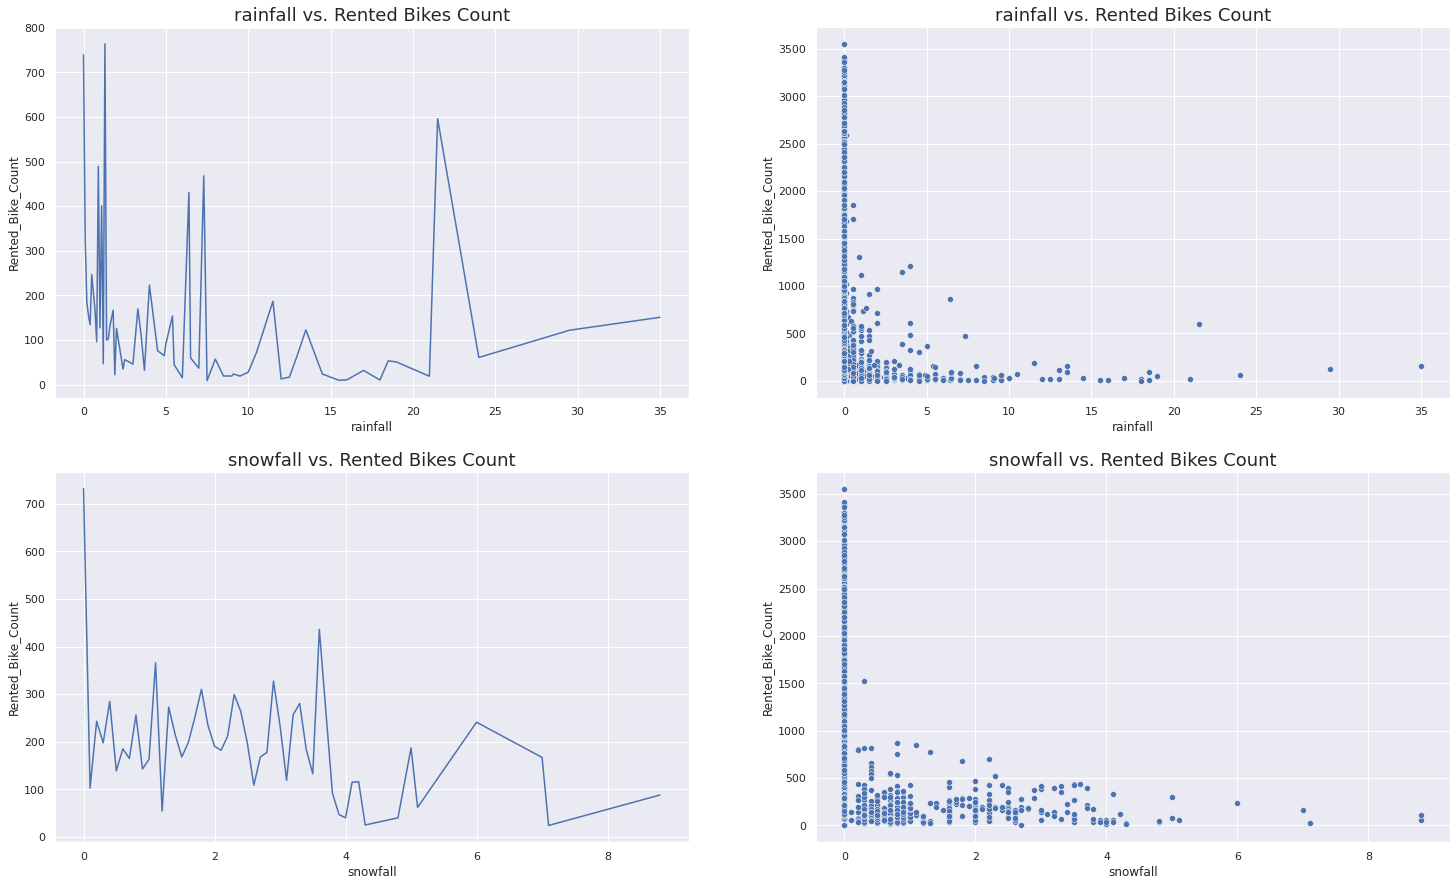

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))
ax = axes.flatten()

temp_df = df.groupby('rainfall').mean()['Rented_Bike_Count']
rainfall_vs_Bike = sns.lineplot(data=temp_df,ax=ax[0])
rainfall_vs_Bike.set_title("rainfall vs. Rented Bikes Count",fontsize=18)

rainfall1=sns.scatterplot(x="rainfall",
                    y="Rented_Bike_Count",
                    data=df,ax=ax[1])
rainfall1.set_title("rainfall vs. Rented Bikes Count",fontsize=18)

#Snowfall
temp_df = df.groupby('snowfall').mean()['Rented_Bike_Count']
snowfall_vs_Bike = sns.lineplot(data=temp_df,ax=ax[2])
snowfall_vs_Bike.set_title("snowfall vs. Rented Bikes Count",fontsize=18)

snowfall_vs_Bike1=sns.scatterplot(x="snowfall",
                    y="Rented_Bike_Count",
                    data=df,ax=ax[3])
snowfall_vs_Bike1.set_title("snowfall vs. Rented Bikes Count",fontsize=18)


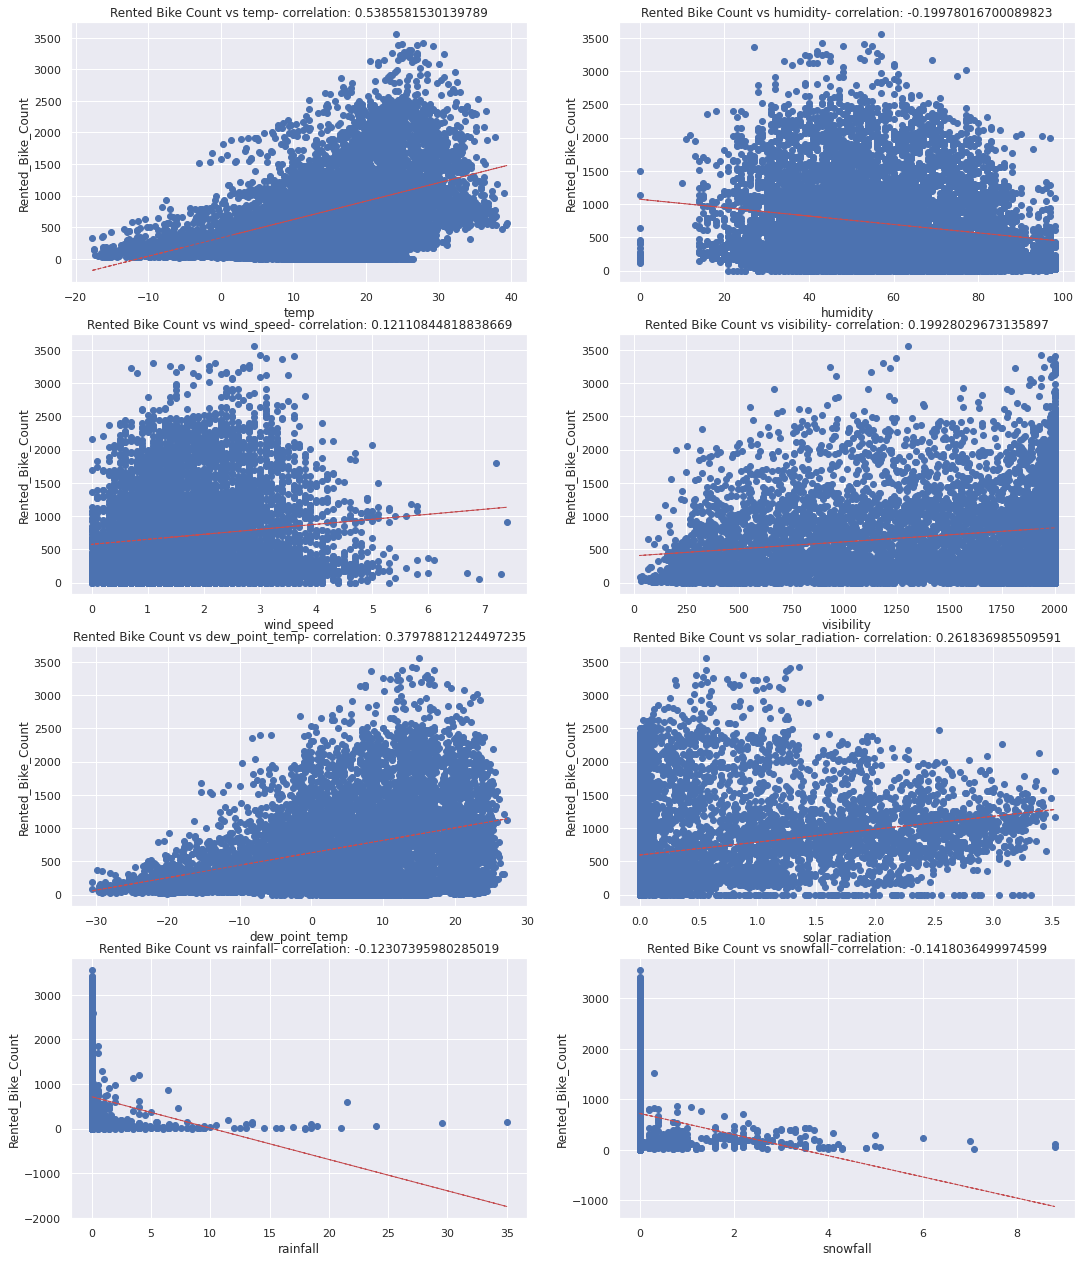

In [49]:
n=1
fig = plt.figure(figsize=(18, 22))
for col in numerical_variables[0:]:
    plt.subplot(4,2,n)
    n=n+1



    #fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_Bike_Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

#Correlation between variables

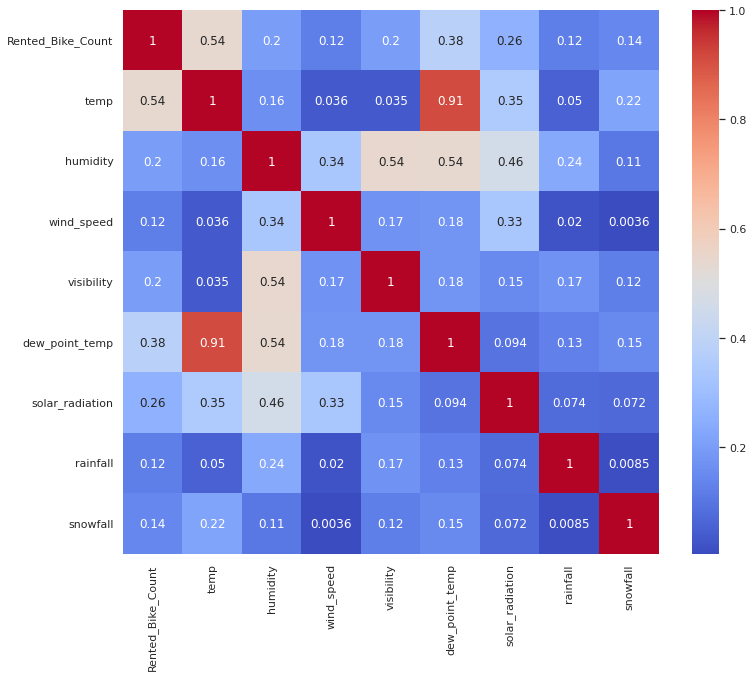

In [50]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

In [51]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,temp,29.075866
1,humidity,5.069743
2,wind_speed,4.517664
3,visibility,9.051931
4,dew_point_temp,15.201989
5,solar_radiation,2.821604
6,rainfall,1.079919
7,snowfall,1.118903


In [53]:
# creating new feature from temperature and dew point temperature as they both are related to each other.
df['Temp_Dew'] = df['temp'] + df['dew_point_temp']
df.drop(['temp', 'dew_point_temp'], axis =1, inplace = True)

In [54]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,humidity,4.948927
1,wind_speed,4.172802
2,visibility,4.390699
3,solar_radiation,2.056034
4,rainfall,1.078836
5,snowfall,1.116727
6,Temp_Dew,2.166404


In [55]:
df.corr()['Rented_Bike_Count']

Rented_Bike_Count    1.000000
humidity            -0.199780
wind_speed           0.121108
visibility           0.199280
solar_radiation      0.261837
rainfall            -0.123074
snowfall            -0.141804
Temp_Dew             0.465880
Name: Rented_Bike_Count, dtype: float64

In [56]:
df_New=pd.get_dummies(df,drop_first=True,sparse=True)
df_New.head()

,Rented_Bike_Count,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,Temp_Dew,Hour_1,Hour_2,...,Month_May,Month_November,Month_October,Month_September,Dayname_Monday,Dayname_Saturday,Dayname_Sunday,Dayname_Thursday,Dayname_Tuesday,Dayname_Wednesday
0,254,37,2.2,2000,0.0,0.0,0.0,-22.8,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,38,0.8,2000,0.0,0.0,0.0,-23.1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,39,1.0,2000,0.0,0.0,0.0,-23.7,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,40,0.9,2000,0.0,0.0,0.0,-23.8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,36,2.3,2000,0.0,0.0,0.0,-24.6,0,0,...,0,0,0,0,0,0,0,0,0,0


#Linear Regression

In [57]:
X = df_New.drop(columns= ['Rented_Bike_Count'], axis =1)

In [58]:
y = np.sqrt(df_New['Rented_Bike_Count'])

In [59]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 53)
(1752, 53)


In [60]:
reg = LinearRegression().fit(X_train, y_train)

In [61]:
reg.score(X_train, y_train)

0.7780822840147327

In [63]:
reg.coef_

array([-1.89420986e-01, -6.20493687e-02,  1.15220781e-03,  9.73769591e-01,
       -1.49176629e+00, -2.35928703e-02,  2.75604205e-01, -1.96496866e+00,
       -4.87380467e+00, -7.20790865e+00, -9.43129107e+00, -9.08037787e+00,
       -4.02811441e+00,  2.18280324e+00,  7.56808925e+00,  1.26919884e+00,
       -3.23168268e+00, -3.45697279e+00, -2.72169688e+00, -2.84517583e+00,
       -2.81215060e+00, -1.65994756e+00,  2.48248599e-01,  3.91114018e+00,
        1.04495601e+01,  6.81993253e+00,  6.01831914e+00,  6.32778470e+00,
        5.05285500e+00,  1.53055615e+00, -1.07047813e+00, -1.67122727e+00,
       -3.22526399e+00,  3.29740854e+00,  2.85948391e+01, -3.24064408e-01,
       -4.16204826e+00,  3.24064408e-01, -2.17545644e+00, -1.37387196e+00,
       -1.88634915e+00,  4.37717014e+00, -9.52233314e-01,  1.92200385e+00,
        2.69127421e+00,  3.18950123e+00,  8.61939548e-02, -1.31874729e+00,
       -1.15399825e+00, -2.75636524e+00, -5.64729455e-01, -4.55895116e-01,
       -4.16426755e-01])

In [64]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [65]:
# evaluating the metrics on train set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#calculate MSE
MSE = mean_squared_error((y_train**2), (y_pred_train**2))
print("MSE :" , MSE)




#calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


#calculate MAE
MAE= mean_absolute_error(y_train**2, y_pred_train**2)
print("MAE :",MAE)


#calculate r2 and adjusted r2
r2= r2_score((y_train)**2, (y_pred_train)**2) #squaring the dependent variable y because dependent variable was transformed using square root
print("R2 :",r2)
Adjusted_R2 = ((1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted R2 :",Adjusted_R2 )

MSE : 100605.9122673608
RMSE : 317.1843506028644
MAE : 215.73174171121033
R2 : 0.7577179934011711
Adjusted R2 : 0.7501555986133396


In [66]:
# evaluating the metrics on test set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#calculate MSE
MSE = mean_squared_error((y_test**2), (y_pred_test**2))
print("MSE :" , MSE)




#calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


#calculate MAE
MAE= mean_absolute_error(y_test**2, y_pred_test**2)
print("MAE :",MAE)


#calculate r2 and adjusted r2
r2= r2_score((y_test)**2, (y_pred_test)**2) #squaring the dependent variable y because dependent variable was transformed using square root
print("R2 :",r2)
Adjusted_R2 = ((1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted R2 :",Adjusted_R2 )

MSE : 98047.31356421197
RMSE : 313.12507654963053
MAE : 212.05237632910465
R2 : 0.7657299360440495
Adjusted R2 : 0.7584176195601476


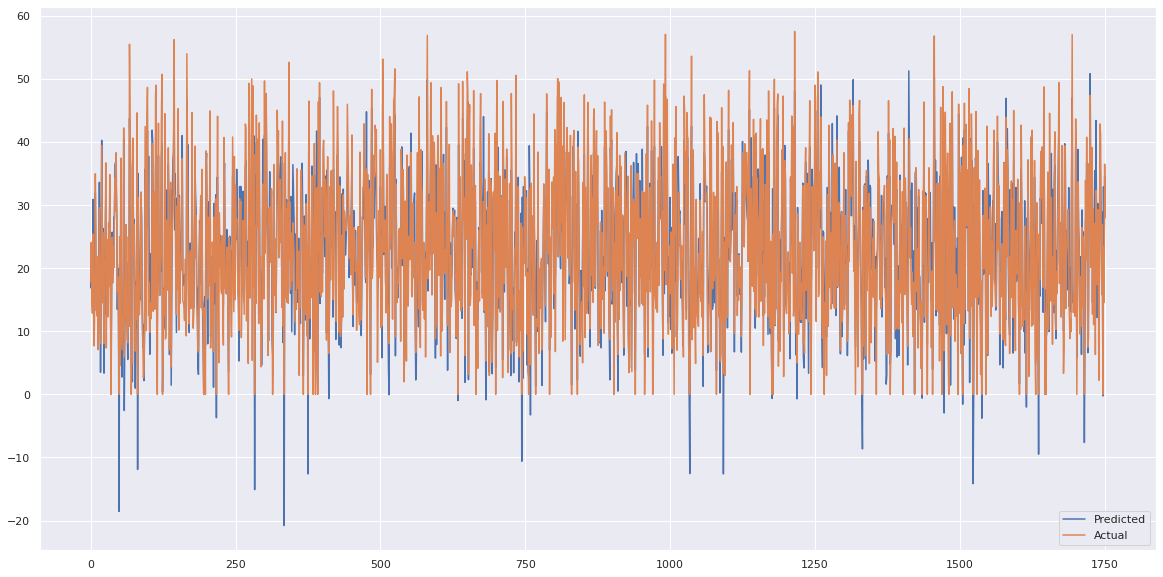

In [67]:
plt.figure(figsize=(20,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#Lasso regression

In [69]:
### Cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [70]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -34.899131903357656


In [71]:
lasso = Lasso(alpha = 0.001,max_iter = 3000 )

In [72]:
# Fitting the model onto training set
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [73]:
# lasso score
lasso.score(X_train, y_train)

0.7780729619574867

In [76]:
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

#Lasso for training data

In [77]:
MSE_lasso= mean_squared_error((y_train**2), (y_pred_lasso_train**2))
print("MSE :" , MSE_lasso)

RMSE_lasso = np.sqrt(MSE)
print("RMSE :" ,RMSE_lasso)


r2_lasso= r2_score((y_train)**2, (y_pred_lasso_train)**2)
print("R2 :" ,r2_lasso)
Adjusted_R2_lasso = ((1-(1-r2_lasso)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted R2 :",Adjusted_R2_lasso)

MSE : 100800.30291002626
RMSE : 313.12507654963053
R2 : 0.757249856351294
Adjusted R2 : 0.7496728495118468


The r2_score for test data using lasso regression is 0.757

#Lasso for testing data

In [78]:
MSE_lasso= mean_squared_error((y_test**2), (y_pred_lasso_test**2))
print("MSE :" , MSE_lasso)

RMSE_lasso = np.sqrt(MSE)
print("RMSE :" ,RMSE_lasso)


r2_lasso= r2_score((y_test)**2, (y_pred_lasso_test)**2)
print("R2 :" ,r2_lasso)
Adjusted_R2_lasso = ((1-(1-r2_lasso)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted R2 :",Adjusted_R2_lasso)

MSE : 98235.1741913018
RMSE : 313.12507654963053
R2 : 0.7652810698841999
Adjusted R2 : 0.7579547428546726


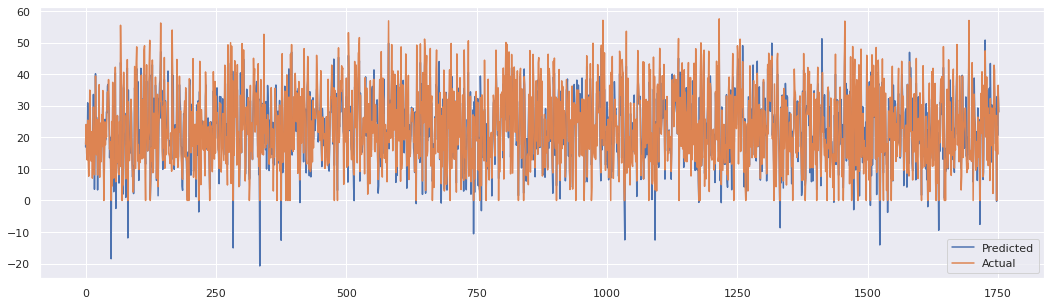

In [80]:
# Plotting the actual and predicted values for lasso regression
plt.figure(figsize=(18,5))
plt.plot(np.array(y_pred_lasso_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()